In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import utilities


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [18]:
ticker = "AAPL"
df = utilities.load_stock(ticker)
# ticker = 'SPY'
# df = utilities.load_index(ticker)

In [19]:
# Add Indicators

df = utilities.RSI(df, 14)
df = utilities.RSI(df, 28)
df = utilities.RSI(df, 56)
df = utilities.RSI(df, 100)

df = utilities.MACD(df)

df = utilities.EMA(df, 10)
df = utilities.EMA(df, 50)
df = utilities.EMA(df, 200)

df = utilities.SMA(df, 10)
df = utilities.SMA(df, 50)
df = utilities.SMA(df, 100)

df = utilities.BollingerBands(df, 20)
df = utilities.BollingerBands(df, 50)
df = utilities.BollingerBands(df, 100)

df = utilities.ATR(df, 14)
df = utilities.ATR(df, 28)
df = utilities.ATR(df, 56)

df = utilities.OBV(df)

df = utilities.VWAP(df)

df = utilities.MFI(df, 14)
df = utilities.MFI(df, 28)
df = utilities.MFI(df, 56)

df = utilities.market_hours_only(df)
df = utilities.time_to_numeric(df)

In [20]:
df.head()

,timestamp,open,high,low,close,volume,ticker,date,time,minute,...,sma50,sma100,bb_upper,bb_lower,atr14,atr28,atr56,obv,vwap,mfi
49,2005-01-03 09:30:00,1.1568,1.1605,1.1568,1.1602,19181680,AAPL,2005-01-03,09:30:00,570,...,1.1619,NaN,NaN,NaN,0.0016,0.0011,NaN,22576176,1.159993,NaN
50,2005-01-03 09:31:00,1.1604,1.1627,1.1598,1.1604,4815272,AAPL,2005-01-03,09:31:00,571,...,1.1621,NaN,NaN,NaN,0.0017,0.0012,NaN,27391448,1.160143,NaN
51,2005-01-03 09:32:00,1.1600,1.1611,1.1573,1.1575,3166912,AAPL,2005-01-03,09:32:00,572,...,1.1620,NaN,NaN,NaN,0.0020,0.0013,NaN,27391448,1.160004,NaN
52,2005-01-03 09:33:00,1.1575,1.1620,1.1566,1.1573,3206000,AAPL,2005-01-03,09:33:00,573,...,1.1618,NaN,NaN,NaN,0.0023,0.0015,NaN,27391448,1.159888,NaN
53,2005-01-03 09:34:00,1.1573,1.1621,1.1530,1.1536,6159384,AAPL,2005-01-03,09:34:00,574,...,1.1616,NaN,NaN,NaN,0.0030,0.0018,NaN,27391448,1.159374,NaN


In [21]:
# map the "minute" column, from 570 to 930, to 0 to 1

df['minute'] = df['minute'].apply(lambda x: (x - 570) / (960 - 570))

In [22]:
# Drop non-numeric columns
df = df.drop(columns=['timestamp', 'ticker', 'date', 'time'])

In [23]:
df.head()

,open,high,low,close,volume,minute,rsi14,rsi28,rsi56,rsi100,...,sma50,sma100,bb_upper,bb_lower,atr14,atr28,atr56,obv,vwap,mfi
49,1.1568,1.1605,1.1568,1.1602,19181680,0.000000,42.7673,41.6327,NaN,NaN,...,1.1619,NaN,NaN,NaN,0.0016,0.0011,NaN,22576176,1.159993,NaN
50,1.1604,1.1627,1.1598,1.1604,4815272,0.002564,47.6190,42.1053,NaN,NaN,...,1.1621,NaN,NaN,NaN,0.0017,0.0012,NaN,27391448,1.160143,NaN
51,1.1600,1.1611,1.1573,1.1575,3166912,0.005128,40.6977,40.0000,NaN,NaN,...,1.1620,NaN,NaN,NaN,0.0020,0.0013,NaN,27391448,1.160004,NaN
52,1.1575,1.1620,1.1566,1.1573,3206000,0.007692,40.2299,38.0392,NaN,NaN,...,1.1618,NaN,NaN,NaN,0.0023,0.0015,NaN,27391448,1.159888,NaN
53,1.1573,1.1621,1.1530,1.1536,6159384,0.010256,33.1754,33.2192,NaN,NaN,...,1.1616,NaN,NaN,NaN,0.0030,0.0018,NaN,27391448,1.159374,NaN


In [24]:
# normalize all other columns
for col in df.columns:
    if col != 'enter':
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [25]:
# Create a column called "value", which repserents how many of the next closes after this one are higher than the current close.
# The window is 390*5, to mean the next 5 days, so the last 100 values will be NaN.

days = 1

window = (390*days) - 1 # Adjusted the window size

# Create a column called "value"
df['value'] = df['close'].rolling(window=window).apply(lambda x: np.mean(x > x.iloc[-1])) 
df['value'] = df['value'].shift(-window)

In [26]:
df.head()

,open,high,low,close,volume,minute,rsi14,rsi28,rsi56,rsi100,...,sma100,bb_upper,bb_lower,atr14,atr28,atr56,obv,vwap,mfi,value
49,0.000193,0.000206,0.000196,0.000211,0.084400,0.000000,0.427673,0.413208,NaN,NaN,...,NaN,NaN,NaN,0.000888,0.000585,NaN,0.000000,0.001895,NaN,0.455013
50,0.000212,0.000217,0.000211,0.000212,0.021187,0.002564,0.476190,0.418275,NaN,NaN,...,NaN,NaN,NaN,0.000957,0.000669,NaN,0.000005,0.001905,NaN,0.529563
51,0.000210,0.000209,0.000199,0.000197,0.013935,0.005128,0.406977,0.395704,NaN,NaN,...,NaN,NaN,NaN,0.001162,0.000752,NaN,0.000005,0.001896,NaN,0.012853
52,0.000197,0.000214,0.000195,0.000196,0.014107,0.007692,0.402299,0.374683,NaN,NaN,...,NaN,NaN,NaN,0.001367,0.000920,NaN,0.000005,0.001888,NaN,0.012853
53,0.000196,0.000214,0.000177,0.000177,0.027102,0.010256,0.331754,0.323009,NaN,NaN,...,NaN,NaN,NaN,0.001845,0.001170,NaN,0.000005,0.001853,NaN,0.007712


In [27]:
df.describe()

,open,high,low,close,volume,minute,rsi14,rsi28,rsi56,rsi100,...,sma100,bb_upper,bb_lower,atr14,atr28,atr56,obv,vwap,mfi,value
count,1.872110e+06,1.872110e+06,1.872110e+06,1.872110e+06,1.872110e+06,1.872110e+06,1.872110e+06,1.872110e+06,1.872103e+06,1.872059e+06,...,1.872060e+06,1.872060e+06,1.872060e+06,1.872110e+06,1.872110e+06,1.872104e+06,1.872110e+06,1.872110e+06,1.872104e+06,1.871721e+06
mean,2.247339e-01,2.247923e-01,2.247843e-01,2.247339e-01,4.231840e-03,4.993335e-01,5.033288e-01,5.063214e-01,5.127070e-01,5.533731e-01,...,2.252292e-01,2.253112e-01,2.247443e-01,2.940709e-02,3.561252e-02,4.150546e-02,7.178595e-01,4.286897e-01,5.114752e-01,4.716604e-01
std,2.732701e-01,2.733460e-01,2.733317e-01,2.732706e-01,7.220205e-03,2.893179e-01,1.590071e-01,1.204791e-01,1.007793e-01,9.062494e-02,...,2.739023e-01,2.740335e-01,2.732218e-01,4.572235e-02,5.442035e-02,6.227067e-02,2.916702e-01,2.731137e-01,1.111537e-01,3.505412e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.877937e-02,2.878621e-02,2.878562e-02,2.877937e-02,6.971269e-04,2.487179e-01,3.902440e-01,4.220204e-01,4.433946e-01,4.915349e-01,...,2.881739e-02,2.882592e-02,2.881481e-02,4.715692e-03,5.767784e-03,6.714060e-03,5.489403e-01,1.762412e-01,4.384170e-01,1.233933e-01
50%,1.139722e-01,1.139942e-01,1.139944e-01,1.139722e-01,1.754337e-03,5.000000e-01,5.000000e-01,5.039356e-01,5.107150e-01,5.514088e-01,...,1.142129e-01,1.141925e-01,1.140003e-01,1.066156e-02,1.295662e-02,1.530411e-02,8.541505e-01,4.344902e-01,5.108607e-01,4.473008e-01
75%,2.538114e-01,2.538428e-01,2.538935e-01,2.538151e-01,5.012330e-03,7.487179e-01,6.155928e-01,5.896598e-01,5.807265e-01,6.137339e-01,...,2.545061e-01,2.543520e-01,2.540168e-01,3.116457e-02,3.769957e-02,4.354265e-02,9.442861e-01,6.023193e-01,5.842441e-01,8.200514e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.974293e-01


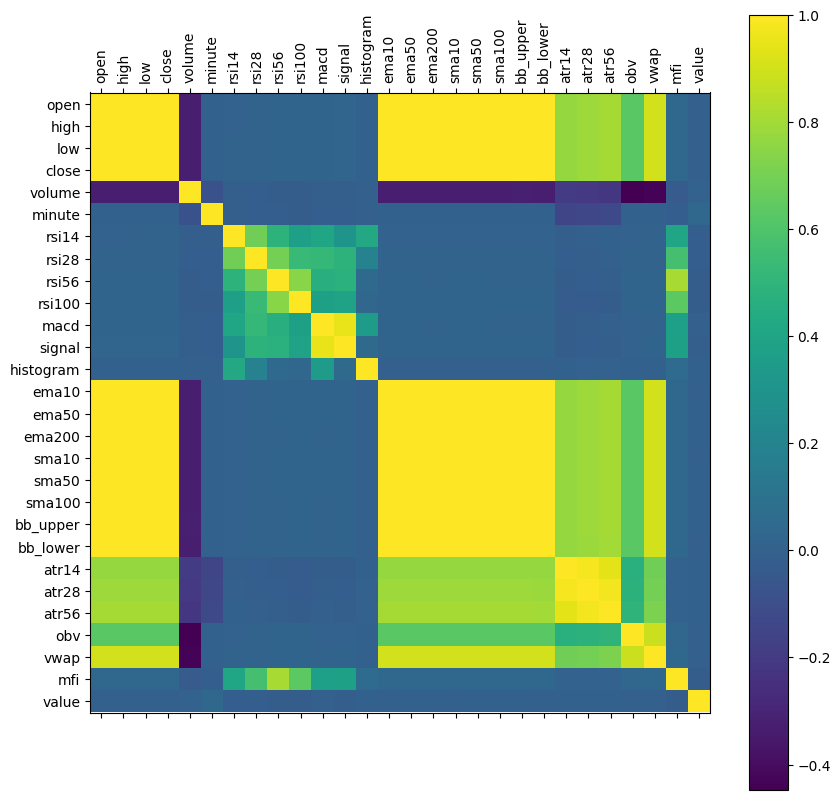

In [28]:
# show the correlation matrix
correlation_matrix = df.corr()
plt.matshow(correlation_matrix)

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.gcf().set_size_inches(10, 10)

plt.show()

In [29]:
filename = 'valued_{}.csv'.format(ticker)
df.to_csv(filename, index=False)